In [10]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt  # Matlab-style plotting
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import train_test_split


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points



In [45]:
#Import and put the dataset in  pandas dataframe

station_data = pd.read_csv('bikes_data_only/data/station_data.csv')
station_data.info() #No missing values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
Id            76 non-null int64
Name          76 non-null object
Lat           76 non-null float64
Long          76 non-null float64
Dock Count    76 non-null int64
City          76 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 3.6+ KB


In [48]:
station_data.head()

,Id,Name,Lat,Long,Dock Count,City
0,2,San Jose Diridon Caltrain Station,37.330,-121.902,27,San Jose
1,3,San Jose Civic Center,37.331,-121.889,15,San Jose
2,4,Santa Clara at Almaden,37.334,-121.895,11,San Jose
3,5,Adobe on Almaden,37.331,-121.893,19,San Jose
4,6,San Pedro Square,37.337,-121.894,15,San Jose


In [192]:
# Removing name, lat, long from data as it might not be helpful for prediction since the id will be correlated with these fields

filter_data_from_station= station_data.loc[:,['Id','Dock Count','City']]
filter_data_from_station.head()

,Id,Dock Count,City
0,2,27,San Jose
1,3,15,San Jose
2,4,11,San Jose
3,5,19,San Jose
4,6,15,San Jose


In [163]:
# Read trips data as pandas dataframe
trip_data = pd.read_csv('bikes_data_only/data/trip_data.csv')
trip_data.info() #No missing values here too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 6 columns):
Trip ID            354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null int64
Subscriber Type    354152 non-null object
dtypes: int64(3), object(3)
memory usage: 16.2+ MB


In [164]:
trip_data.head()

,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,913460,31/08/2015 23:26,50,31/08/2015 23:39,70,Subscriber
1,913459,31/08/2015 23:11,31,31/08/2015 23:28,27,Subscriber
2,913455,31/08/2015 23:13,47,31/08/2015 23:18,64,Subscriber
3,913454,31/08/2015 23:10,10,31/08/2015 23:17,8,Subscriber
4,913453,31/08/2015 23:09,51,31/08/2015 23:22,60,Customer


In [211]:

merged_trip_start_station_data = filter_data_from_station.merge(trip_data, how='left', left_on='Id', right_on='Start Station' )
merged_trip_start_station_data.head()



,Id,Dock Count,City,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,2,27,San Jose,913217,31/08/2015 18:43,2,31/08/2015 18:56,16,Subscriber
1,2,27,San Jose,913216,31/08/2015 18:41,2,31/08/2015 18:51,84,Subscriber
2,2,27,San Jose,913203,31/08/2015 18:36,2,31/08/2015 18:44,7,Subscriber
3,2,27,San Jose,913202,31/08/2015 18:36,2,31/08/2015 18:44,7,Subscriber
4,2,27,San Jose,913112,31/08/2015 18:03,2,31/08/2015 18:08,4,Subscriber


In [212]:
merged_trip_start_station_data["hour"] = pd.DatetimeIndex(merged_trip_start_station_data['Start Date']).hour
merged_trip_start_station_data["month"] = pd.DatetimeIndex(merged_trip_start_station_data['Start Date']).month
merged_trip_start_station_data["day"] = pd.DatetimeIndex(merged_trip_start_station_data['Start Date']).dayofweek
merged_trip_start_station_data["year"] = pd.DatetimeIndex(merged_trip_start_station_data['Start Date']).year


In [213]:
merged_trip_start_station_data["date"] = pd.DatetimeIndex(merged_trip_start_station_data['Start Date']).date
merged_trip_start_station_data['date'] = pd.to_datetime(merged_trip_start_station_data['date'])

In [214]:
merged_trip_start_station_data.head()

,Id,Dock Count,City,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type,hour,month,day,year,date
0,2,27,San Jose,913217,31/08/2015 18:43,2,31/08/2015 18:56,16,Subscriber,18,8,0,2015,2015-08-31
1,2,27,San Jose,913216,31/08/2015 18:41,2,31/08/2015 18:51,84,Subscriber,18,8,0,2015,2015-08-31
2,2,27,San Jose,913203,31/08/2015 18:36,2,31/08/2015 18:44,7,Subscriber,18,8,0,2015,2015-08-31
3,2,27,San Jose,913202,31/08/2015 18:36,2,31/08/2015 18:44,7,Subscriber,18,8,0,2015,2015-08-31
4,2,27,San Jose,913112,31/08/2015 18:03,2,31/08/2015 18:08,4,Subscriber,18,8,0,2015,2015-08-31


In [215]:
merged_trip_start_station_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354152 entries, 0 to 354151
Data columns (total 14 columns):
Id                 354152 non-null int64
Dock Count         354152 non-null int64
City               354152 non-null object
Trip ID            354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null int64
Subscriber Type    354152 non-null object
hour               354152 non-null int64
month              354152 non-null int64
day                354152 non-null int64
year               354152 non-null int64
date               354152 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 40.5+ MB


In [216]:
df1 = merged_trip_start_station_data.groupby(['Id','date' ,'day','hour']).size()
df1 = df1.to_frame()
df1.reset_index(inplace=True)
df1.columns=['Id', 'date','day','hour','outgoing_bikes']
df1.head()

,Id,date,day,hour,outgoing_bikes
0,2,2014-01-09,3,12,1
1,2,2014-01-09,3,21,4
2,2,2014-01-09,3,22,1
3,2,2014-01-10,4,6,1
4,2,2014-01-10,4,7,3


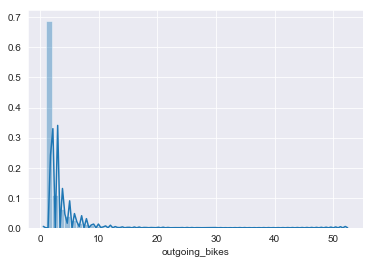

In [217]:
sns.distplot(df1["outgoing_bikes"])

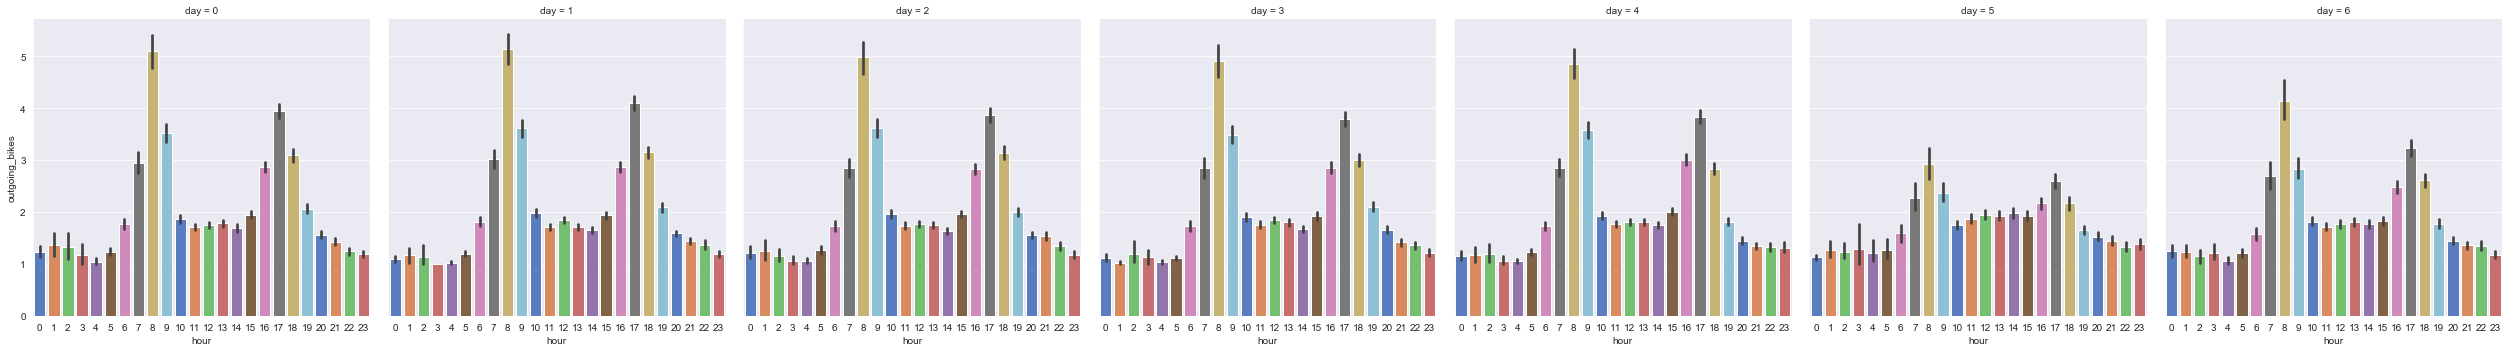

In [218]:
import seaborn as sns
g = sns.catplot(x="hour",y="outgoing_bikes", col='day', data=df1, kind="bar", size=5, palette = "muted")
# There is a pattern between weekday and weekend. Can create new feature of weekday and weekened to make the data richer

In [220]:
df2 = df1.groupby(['Id','date','day']).size()
df2 = df2.to_frame()
df2.reset_index(inplace=True)
df2.columns=['Id','date' ,'day','count_of_hours']
df2.head()

,Id,date,day,count_of_hours
0,2,2014-01-09,3,3
1,2,2014-01-10,4,8
2,2,2014-01-11,5,4
3,2,2014-01-12,6,8
4,2,2014-02-09,6,8


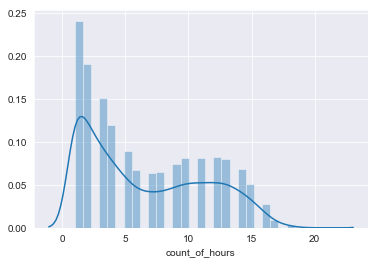

In [221]:

sns.distplot(df2["count_of_hours"]);
# There are many stations which do not have any trips starting from that station during many hours of the day

## Endtrip stations

In [167]:

merged_trip_end_station_data = filter_data_from_station.merge(trip_data, how='left', left_on='Id', right_on='End Station' )
merged_trip_end_station_data.head()


,Id,Dock Count,City,Trip ID,Start Date,Start Station,End Date,End Station,Subscriber Type
0,2,27,San Jose,913134,31/08/2015 18:12,4,31/08/2015 18:16,2,Subscriber
1,2,27,San Jose,913118,31/08/2015 18:05,5,31/08/2015 18:10,2,Subscriber
2,2,27,San Jose,913111,31/08/2015 18:03,4,31/08/2015 18:08,2,Subscriber
3,2,27,San Jose,912960,31/08/2015 17:32,4,31/08/2015 17:36,2,Subscriber
4,2,27,San Jose,912918,31/08/2015 17:19,6,31/08/2015 17:26,2,Subscriber


In [169]:
merged_trip_end_station_data["hour"] = pd.DatetimeIndex(merged_trip_end_station_data['End Date']).hour
merged_trip_end_station_data["month"] = pd.DatetimeIndex(merged_trip_end_station_data['End Date']).month
merged_trip_end_station_data["day"] = pd.DatetimeIndex(merged_trip_end_station_data['End Date']).dayofweek
merged_trip_end_station_data["year"] = pd.DatetimeIndex(merged_trip_end_station_data['End Date']).year
merged_trip_end_station_data["date"] = pd.DatetimeIndex(merged_trip_end_station_data['End Date']).date

merged_trip_end_station_data['date'] = pd.to_datetime(merged_trip_end_station_data['date'])

In [204]:
df3 = merged_trip_end_station_data.groupby(['Id', 'date', 'day','hour']).size() # Gives number of bikes incoming on a station on any dayof week at an hour for a adtae 
df3 = df3.to_frame()
df3.reset_index(inplace=True)
df3.columns=['Id', 'date', 'day','hour','incoming_bikes']
df3.head()

,Id,date,day,hour,incoming_bikes
0,2,2014-01-09,3,14,1
1,2,2014-01-10,4,7,4
2,2,2014-01-10,4,9,1
3,2,2014-01-10,4,12,1
4,2,2014-01-10,4,14,1


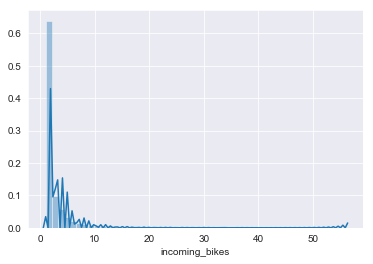

In [205]:
sns.distplot(df3["incoming_bikes"])

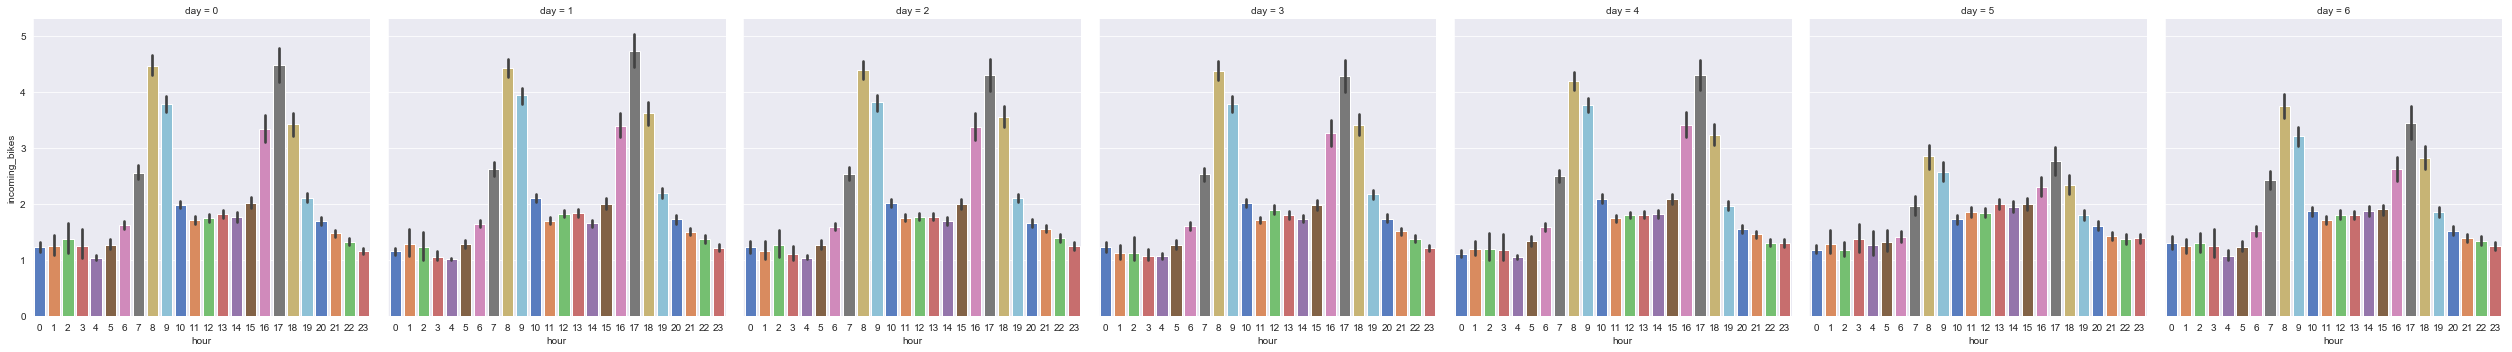

In [206]:

g = sns.catplot(x="hour",y="incoming_bikes", col='day', data=df3, kind="bar", size=5, palette = "muted")
# There is a pattern between weekday and weekend. Can create new feature of weekday and weekened to make the data richer

In [207]:
df4 = df3.groupby(['Id','day','date']).size()
df4 = df4.to_frame()
df4.reset_index(inplace=True)
df4.columns=['Id','day','date' ,'count_of_hours']
df4.head()

,Id,day,date,count_of_hours
0,2,0,2014-02-10,9
1,2,0,2014-03-10,9
2,2,0,2014-05-12,7
3,2,0,2014-06-09,3
4,2,0,2014-08-11,4


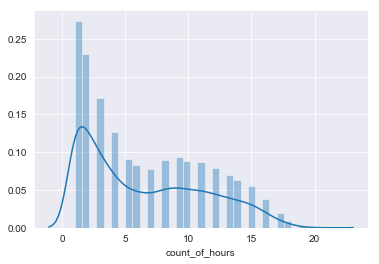

In [208]:

sns.distplot(df4["count_of_hours"]);
# There are many stations which do not have any trips starting from that station during many hours of the day

## Create y variable as change in number of bikes at a station : trips_ended - trips_started

In [222]:
# Merge data on id, day, and hour to get the coming and outgoing bikes
df5 = df1.merge(df3, how="outer", on =['Id','date','day','hour'])
df5.head()

,Id,date,day,hour,outgoing_bikes,incoming_bikes
0,2,2014-01-09,3,12,1.000,nan
1,2,2014-01-09,3,21,4.000,nan
2,2,2014-01-09,3,22,1.000,nan
3,2,2014-01-10,4,6,1.000,nan
4,2,2014-01-10,4,7,3.000,4.000


In [223]:
df5.isnull().sum()

Id                    0
date                  0
day                   0
hour                  0
outgoing_bikes    55641
incoming_bikes    59491
dtype: int64

In [224]:
# Nulls included in data due to outer join for ids where there are incoming bikes but not outgoing and vice versa.
# We can fill those columns with 0
df5 = df5.fillna(0) 
df5.isnull().sum() 

Id                0
date              0
day               0
hour              0
outgoing_bikes    0
incoming_bikes    0
dtype: int64

In [225]:
df5['net_chnage'] = df5['incoming_bikes']-df5['outgoing_bikes'] #change in number of bikes at a station : trips_ended - trips_started
df5.head()

,Id,date,day,hour,outgoing_bikes,incoming_bikes,net_chnage
0,2,2014-01-09,3,12,1.000,0.000,-1.000
1,2,2014-01-09,3,21,4.000,0.000,-4.000
2,2,2014-01-09,3,22,1.000,0.000,-1.000
3,2,2014-01-10,4,6,1.000,0.000,-1.000
4,2,2014-01-10,4,7,3.000,4.000,1.000


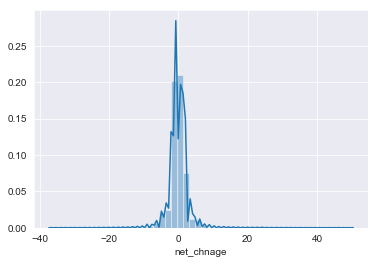

In [226]:
sns.distplot(df5["net_chnage"]);



### Combine the features of the station with the change rate

In [227]:
df5.shape

(198156, 7)

In [228]:
combined_data = df5.merge(filter_data_from_station, how='left', on=['Id']) 
combined_data.shape #no loss of data on join

(198156, 9)

In [229]:
combined_data.head()

,Id,date,day,hour,outgoing_bikes,incoming_bikes,net_chnage,Dock Count,City
0,2,2014-01-09,3,12,1.000,0.000,-1.000,27,San Jose
1,2,2014-01-09,3,21,4.000,0.000,-4.000,27,San Jose
2,2,2014-01-09,3,22,1.000,0.000,-1.000,27,San Jose
3,2,2014-01-10,4,6,1.000,0.000,-1.000,27,San Jose
4,2,2014-01-10,4,7,3.000,4.000,1.000,27,San Jose


### Weather data

In [313]:
weather_data = pd.read_csv('bikes_data_only/data/weather_data.csv')
weather_data.info() #Check if y variable has missing value. Drop that row.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 24 columns):
Date                         1825 non-null object
Max TemperatureF             1821 non-null float64
Mean TemperatureF            1821 non-null float64
Min TemperatureF             1821 non-null float64
Max Dew PointF               1775 non-null float64
MeanDew PointF               1775 non-null float64
Min DewpointF                1775 non-null float64
Max Humidity                 1775 non-null float64
Mean Humidity                1775 non-null float64
Min Humidity                 1775 non-null float64
Max Sea Level PressureIn     1824 non-null float64
Mean Sea Level PressureIn    1824 non-null float64
Min Sea Level PressureIn     1824 non-null float64
Max VisibilityMiles          1820 non-null float64
Mean VisibilityMiles         1820 non-null float64
Min VisibilityMiles          1820 non-null float64
Max Wind SpeedMPH            1824 non-null float64
Mean Wind SpeedMPH         

In [314]:
weather_data['date'] = pd.to_datetime(weather_data['Date'])
weather_data = weather_data.drop('Date', axis=1)
weather_data = weather_data.drop('Zip', axis=1)


In [315]:
weather_data.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,date
0,83.000,70.000,57.000,58.000,56.000,52.000,86.000,64.000,42.000,29.860,...,10.000,8.000,16.000,7.000,20.000,0.000,0.000,NaN,290.000,2014-01-09
1,72.000,66.000,60.000,58.000,57.000,55.000,84.000,73.000,61.000,29.870,...,10.000,7.000,21.000,8.000,nan,0.000,5.000,NaN,290.000,2014-02-09
2,76.000,69.000,61.000,57.000,56.000,55.000,84.000,69.000,53.000,29.810,...,10.000,10.000,21.000,8.000,24.000,0.000,4.000,NaN,276.000,2014-03-09
3,74.000,68.000,61.000,57.000,57.000,56.000,84.000,71.000,57.000,29.810,...,10.000,8.000,22.000,8.000,25.000,0.000,5.000,NaN,301.000,2014-04-09
4,72.000,66.000,60.000,57.000,56.000,54.000,84.000,71.000,57.000,29.920,...,9.000,7.000,18.000,8.000,32.000,0.000,4.000,NaN,309.000,2014-05-09


## Impute missing data

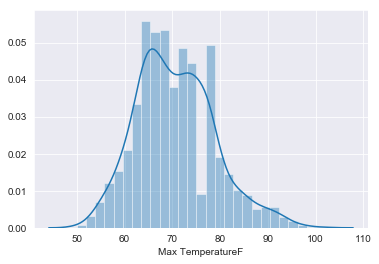

In [316]:
sns.distplot(weather_data['Max TemperatureF'].dropna());

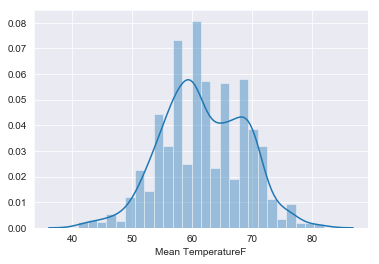

In [317]:
sns.distplot(weather_data['Mean TemperatureF'].dropna());

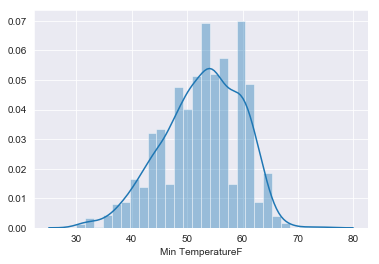

In [318]:
sns.distplot(weather_data['Min TemperatureF'].dropna());

In [319]:
# Since only 4 values are missing in this dataframe and the data follows somewhat normal distribution we can impute the missing value with the mode value of the column
weather_data['Max TemperatureF'] = weather_data['Max TemperatureF'].fillna(weather_data['Max TemperatureF'].mode()[0])
weather_data['Min TemperatureF'] = weather_data['Min TemperatureF'].fillna(weather_data['Min TemperatureF'].mode()[0])
weather_data['Mean TemperatureF'] = weather_data['Mean TemperatureF'].fillna(weather_data['Mean TemperatureF'].mode()[0])





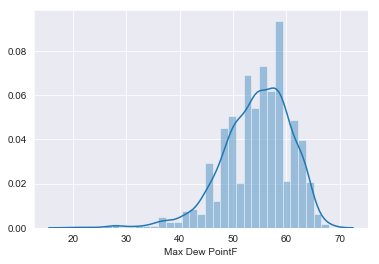

In [320]:
sns.distplot(weather_data['Max Dew PointF'].dropna());


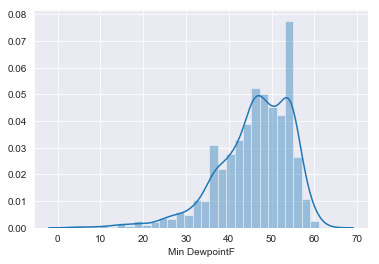

In [321]:
sns.distplot(weather_data['Min DewpointF'].dropna());


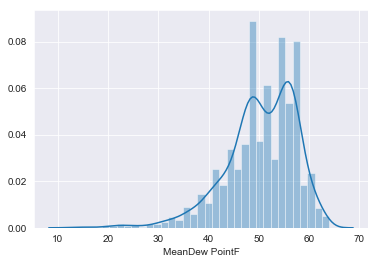

In [322]:
sns.distplot(weather_data['MeanDew PointF'].dropna()); 

## Use same strategy for all the columns with missing value except for events

In [325]:
#cols = weather_data.columns
cols = ['date', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressureIn',
       'Mean Sea Level PressureIn', 'Min Sea Level PressureIn',
       'Max VisibilityMiles', 'Mean VisibilityMiles', 'Min VisibilityMiles',
       'Max Wind SpeedMPH', 'Mean Wind SpeedMPH', 'Max Gust SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'WindDirDegrees']

In [326]:
for col in cols:
    weather_data[col] = weather_data[col].fillna(weather_data[col].mode()[0])

In [327]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 23 columns):
Max TemperatureF             1825 non-null float64
Mean TemperatureF            1825 non-null float64
Min TemperatureF             1825 non-null float64
Max Dew PointF               1825 non-null float64
MeanDew PointF               1825 non-null float64
Min DewpointF                1825 non-null float64
Max Humidity                 1825 non-null float64
Mean Humidity                1825 non-null float64
Min Humidity                 1825 non-null float64
Max Sea Level PressureIn     1825 non-null float64
Mean Sea Level PressureIn    1825 non-null float64
Min Sea Level PressureIn     1825 non-null float64
Max VisibilityMiles          1825 non-null float64
Mean VisibilityMiles         1825 non-null float64
Min VisibilityMiles          1825 non-null float64
Max Wind SpeedMPH            1825 non-null float64
Mean Wind SpeedMPH           1825 non-null float64
Max Gust SpeedMPH         

In [328]:
weather_data['Events'] = weather_data['Events'].fillna('None') # Missing events means no events

In [337]:
weather_data.shape

(1825, 23)

## Get dummy variable for categorical data

In [338]:
weather_data['Events'].unique()
weather_data['Events'] = weather_data['Events'].fillna('None') # Missing events means no events

In [339]:
weather_data = pd.get_dummies(weather_data)
weather_data.shape

(1825, 27)

In [340]:
weather_data.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max Gust SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees,date,Events_Fog,Events_Fog-Rain,Events_None,Events_Rain,Events_Rain-Thunderstorm
0,83.000,70.000,57.000,58.000,56.000,52.000,86.000,64.000,42.000,29.860,...,20.000,0.000,0.000,290.000,2014-01-09,0,0,1,0,0
1,72.000,66.000,60.000,58.000,57.000,55.000,84.000,73.000,61.000,29.870,...,22.000,0.000,5.000,290.000,2014-02-09,0,0,1,0,0
2,76.000,69.000,61.000,57.000,56.000,55.000,84.000,69.000,53.000,29.810,...,24.000,0.000,4.000,276.000,2014-03-09,0,0,1,0,0
3,74.000,68.000,61.000,57.000,57.000,56.000,84.000,71.000,57.000,29.810,...,25.000,0.000,5.000,301.000,2014-04-09,0,0,1,0,0
4,72.000,66.000,60.000,57.000,56.000,54.000,84.000,71.000,57.000,29.920,...,32.000,0.000,4.000,309.000,2014-05-09,0,0,1,0,0


# Merge it with the bikes data

In [341]:
final_data = combined_data.merge(weather_data, how='left', on='date' )


In [344]:
final_data['City'].unique()

array(['San Jose', 'Redwood City', 'Mountain View', 'Palo Alto',
       'San Francisco'], dtype=object)

In [345]:
final_data.shape

(990780, 35)

In [346]:
final_data = pd.get_dummies(final_data)
final_data.shape

(990780, 39)

In [347]:
final_data.info() #No more nulls 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990780 entries, 0 to 990779
Data columns (total 39 columns):
Id                           990780 non-null int64
date                         990780 non-null datetime64[ns]
day                          990780 non-null int64
hour                         990780 non-null int64
outgoing_bikes               990780 non-null float64
incoming_bikes               990780 non-null float64
net_chnage                   990780 non-null float64
Dock Count                   990780 non-null int64
Max TemperatureF             990780 non-null float64
Mean TemperatureF            990780 non-null float64
Min TemperatureF             990780 non-null float64
Max Dew PointF               990780 non-null float64
MeanDew PointF               990780 non-null float64
Min DewpointF                990780 non-null float64
Max Humidity                 990780 non-null float64
Mean Humidity                990780 non-null float64
Min Humidity                 990780 non-nu

In [413]:
final_data.head()

,Id,date,day,hour,outgoing_bikes,incoming_bikes,net_chnage,Dock Count,Max TemperatureF,Mean TemperatureF,...,Events_Fog,Events_Fog-Rain,Events_None,Events_Rain,Events_Rain-Thunderstorm,City_Mountain View,City_Palo Alto,City_Redwood City,City_San Francisco,City_San Jose
0,2,2014-01-09,3,12,1.000,0.000,-1.000,27,83.000,70.000,...,0,0,1,0,0,0,0,0,0,1
1,2,2014-01-09,3,12,1.000,0.000,-1.000,27,89.000,74.000,...,0,0,1,0,0,0,0,0,0,1
2,2,2014-01-09,3,12,1.000,0.000,-1.000,27,86.000,72.000,...,0,0,1,0,0,0,0,0,0,1
3,2,2014-01-09,3,12,1.000,0.000,-1.000,27,85.000,73.000,...,0,0,1,0,0,0,0,0,0,1
4,2,2014-01-09,3,12,1.000,0.000,-1.000,27,86.000,72.000,...,0,0,1,0,0,0,0,0,0,1


# Modelling

In [348]:
from sklearn.linear_model import ElasticNet, Lasso,ElasticNetCV,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [349]:
#Validation function

n_folds = 10
def rmse_cv(model, X, y):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [369]:
y = final_data['net_chnage']
X = final_data.drop(['date','outgoing_bikes','incoming_bikes','net_chnage'], axis=1)

In [370]:
X.shape, y.shape

((990780, 35), (990780,))

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#will treat y_train, y_test as completely unseen data

print("Shape of X_train ",X_train.shape)
print("Shape of y_train ", y_train.shape)
print("Shape of X_test ",X_test.shape)
print("Shape of y_test ", y_test.shape)

Shape of X_train  (792624, 35)
Shape of y_train  (792624,)
Shape of X_test  (198156, 35)
Shape of y_test  (198156,)


In [392]:
enetcv = ElasticNetCV(cv=10,  n_alphas=100) # Elasticnet cross validation will choose optimal alpha by performing 10 fold cross validation
enetcv.fit(X_train, y_train)
print(enetcv.alpha_)
print(enetcv.l1_ratio_)

0.033156912662451264
0.5


## Error of the model

In [393]:
rmse_cv(ElasticNet(alpha=0.033, l1_ratio=.5, random_state=3),X_train ,y_train).mean() 

2.9110007925664965

In [394]:
coef = pd.Series(enetcv.coef_, index = X_train.columns)

In [395]:
print("Enet picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Enet picked 5 variables and eliminated the other 30 variables


In [399]:
coef.sort_values(ascending=False)

hour                         0.014
Dock Count                   0.006
Mean Humidity                0.000
City_San Jose               -0.000
Min DewpointF                0.000
Mean Sea Level PressureIn   -0.000
Max Sea Level PressureIn    -0.000
Min Humidity                 0.000
Max Humidity                 0.000
Max Dew PointF               0.000
MeanDew PointF               0.000
Max VisibilityMiles         -0.000
Min TemperatureF            -0.000
Mean TemperatureF           -0.000
Max TemperatureF            -0.000
day                         -0.000
Min Sea Level PressureIn     0.000
Mean VisibilityMiles        -0.000
City_San Francisco           0.000
Events_Fog-Rain             -0.000
City_Redwood City           -0.000
City_Palo Alto               0.000
City_Mountain View           0.000
Events_Rain-Thunderstorm     0.000
Events_Rain                 -0.000
Events_None                 -0.000
Events_Fog                   0.000
Min VisibilityMiles         -0.000
CloudCover          

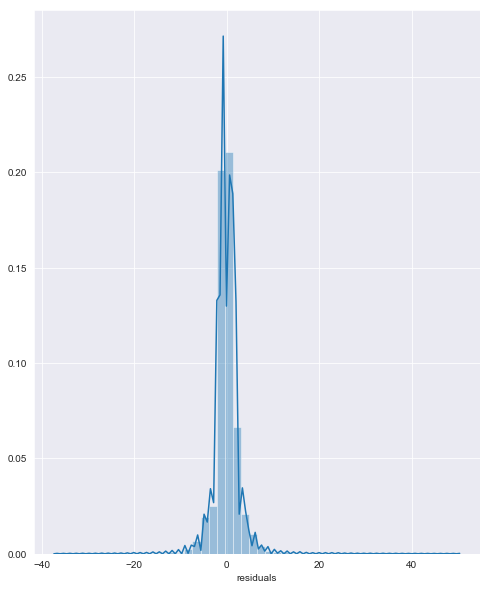

In [404]:
preds = pd.DataFrame({"preds":enetcv.predict(X_test), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
sns.distplot(preds["residuals"]);


In [411]:
error_pred = np.sqrt(preds["residuals"]).mean()

In [412]:
print("RMSE Error", error_pred)

RMSE Error 1.2084073483109852


# Improvements:

1. Can try few more feature engineering: include month etc
2. More granular level prediction such as on minute

3. Try another model such as xgboost
4. Regularization seems high in this model, fine tune that

# Conclusion

Even after data exploration, the final model can be improved. Due to time contraints could not explore it more. 